car_ID
CarName
fueltype
horsepower
peakrpm
citympg
highwaympg
price
   car_ID                   CarName fueltype  horsepower  peakrpm  citympg  \
0       1        alfa-romero giulia      gas         111     5000       21   
1       2       alfa-romero stelvio      gas         111     5000       21   
2       3  alfa-romero Quadrifoglio      gas         154     5000       19   
3       4               audi 100 ls      gas         102     5500       24   
4       5                audi 100ls      gas         115     5500       18   
5       6                  audi fox      gas         110     5500       19   
6       7                audi 100ls      gas         110     5500       19   
7       8                 audi 5000      gas         110     5500       19   
8       9                 audi 4000      gas         140     5500       17   
9      10       audi 5000s (diesel)      gas         160     5500       16   

   highwaympg      price  
0          27  13495.000  
1          27  1650

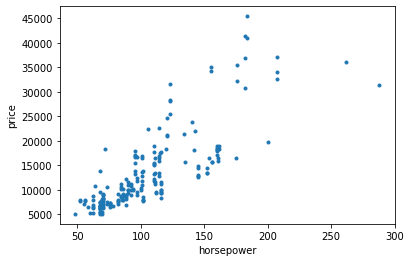

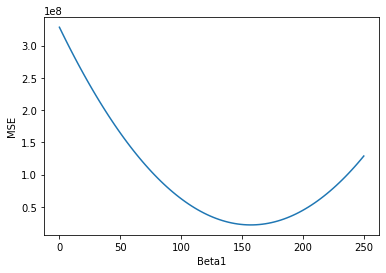

The test MSE is 18364434.975842834


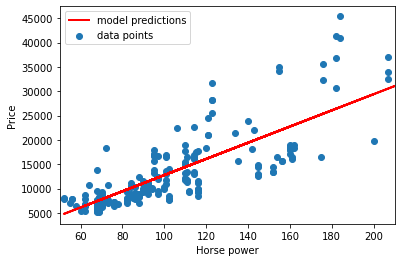

The test MSE is 18307908.54146726


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# %matplotlib inline

df = pd.read_csv('CarPrice_Assignment.csv')

def problem1():
  #print out col label
  for col in df:
    print(col)

  #top 10 rows
  print(df.head(10))

  #scatter plot
  plt.plot(df.horsepower, df.price, ".")
  plt.xlabel('horsepower')
  plt.ylabel('price')
  plt.show()

def problem2():
  beta0 = -3000
  mse_list = []
  beta1_list = []

  for beta1 in np.linspace(0, 250, 100):
    ret = beta0 + beta1 * df.horsepower 
    mse = np.sum((ret - df.price)**2) / len(df)
    mse_list.append(mse) 
    beta1_list.append(beta1)

  plt.plot(beta1_list, mse_list)
  plt.xlabel('Beta1')
  plt.ylabel('MSE')
  plt.show()

def problem3():
  x = df[['horsepower']]
  y = df[['price']]

  xtrain, xtest, ytrain, ytest = train_test_split(x,y,train_size=0.7)
  MyLinear = LinearRegression()
  MyLinear.fit(xtrain, ytrain)
  ret = MyLinear.predict(xtest)
  mse = mean_squared_error(ret, ytest)
  print('The test MSE is {}'.format(mse))
  fig, ax = plt.subplots()
  ax.scatter(x,y,label='data points')
  ax.plot(xtest,ret,color='red',linewidth=2,label='model predictions')
  ax.set_xlabel('Horse power')
  ax.set_ylabel('Price')
  ax.legend()
  ax.set_xlim([50, 210])
  plt.show()

def problem4():

  x = df[['horsepower', 'peakrpm', 'citympg', 'highwaympg']]
  y = df[['price']]

  xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.7)
  MyLinear = LinearRegression()
  MyLinear.fit(xtrain, ytrain)
  ret = MyLinear.predict(xtest)
  mse = mean_squared_error(ret, ytest)
  print('The test MSE is {}'.format(mse))




problem1()
problem2()
problem3()
problem4()

